In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

# Tutorial del Método SAS (Singular Spectrum Analysis)

En este tutorial revisaremos los conceptos más relevantes de la metodología de SSA. Realizaremos varios ejemplos donde primeramente un ejercicio conceptual teórico introductorio del método a una serie de tiempo muy sencilla. Posteriormente realizaremos dos ejercicios; en el primero aplicaremos el método a una serie de datos abiertos de  ventas de un producto donde aplicaremos todos los pasos de la metodología. Finalmente, relaizaremos un ejericio con datos financieros, obtenidos de la base de referencia de yahoo finance. 

**Contenido**
1. [Importación de librerías requeridas](#2)
1. [Ejemplo 1: Ejemplo conceptual](#3)
     1. [Fase 1](#4)
     1. [Fase 2](#5)
1. [Funciones manuales](#7)
1. [Ejemplo 2: Ejemplo introductorio](#8)
1. [Ejemplo 3: Datos Financieros](#9)

<a id="2"></a> <br>
### 1. Importación de librerías requeridas

En este primer paso, importaremos las siguientes librerías para desarrollar este tutorial. Es posible que tengas que instalar las librerías de Rssa. 

In [2]:
#install.packages("dplyr")
#install.packages("Rssa")
library(Rssa)

Loading required package: svd

Warning message:
“package ‘svd’ was built under R version 4.2.3”
Loading required package: forecast

Warning message:
“package ‘forecast’ was built under R version 4.2.3”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘Rssa’


The following object is masked from ‘package:stats’:

    decompose




<a id="3"></a> <br>
### 2. Ejemplo conceptual

COmenzaremos con el primer ejemplo conceptual del método. Este ejemplo vamos a crear una serie muy sencilla, del 1 al 15 al cuál aplicaremos el método de SSA.

In [3]:
#Generamos la serie, así como la definición de una ventana para la creación de la matriz de Hankel. 
#En este caso, definimos como L=7. Posteriormente, definimos la función del número de columnas, K de la matriz, a partir de la longitud, L.
Y<-1:15
L<-7
K<-length(Y)-L+1
K

[1] 9

<a id="4"></a> <br>
#### A. Fase 1
En la primera fase generamos el nuevo mapeo de los datos, o fase de embedding, que resulta en la matriz de Hankel.

In [4]:
#Paso 1 Embedding
X<-outer((1:L), (1:K), function(x,y) Y[(x+y-1)]) ##outer product
X  #Matriz Hankel

1,2,3,4,5,6,7,8,9
2,3,4,5,6,7,8,9,10
3,4,5,6,7,8,9,10,11
4,5,6,7,8,9,10,11,12
5,6,7,8,9,10,11,12,13
6,7,8,9,10,11,12,13,14
7,8,9,10,11,12,13,14,15


In [5]:
#Paso 2 SVD
#En este paso, generamos la descomposición del valor singular de la matriz Hankel. Podemos obervar que tendremos los valores característicos a través del vector d de la función.
# Asímismo, los vectores derechos e izquieros (u y v, respectivamente).
SVD<-svd(X)
SVD

-0.2427378,0.63668208,0.38417357,-0.55067922,0.2632765,0.07424044,-0.10025559
-0.2846725,0.45241117,-0.62950318,0.36357855,0.2027911,0.37888398,-0.03383481
-0.3266071,0.26814026,-0.03799781,0.06418018,-0.3712836,-0.42879219,0.70295900
-0.3685418,0.08386935,0.53059433,0.51857341,-0.4086887,0.19729190,-0.31740125
-0.4104765,-0.10040156,-0.38094801,-0.29590681,-0.2914526,-0.43181371,-0.56332819
-0.4524112,-0.28467248,0.16457879,0.26555529,0.7004914,-0.35294208,0.03773172
-0.4943458,-0.46894339,-0.03089768,-0.36530139,-0.0951340,0.56313165,0.27412912
-0.1679805,-0.59123627,0.76753588,0.17558128,-0.04663828,-0.001167502,-0.008357727
-0.2056854,-0.46776559,-0.34299950,-0.22819603,0.18981085,0.210933887,-0.420092081
-0.2433902,-0.34429490,-0.30925776,0.00644829,0.03353187,0.367775504,0.683021053
-0.2810951,-0.22082422,-0.21872605,-0.02973600,0.23897213,-0.146522717,-0.144713960


In [6]:
##Podemos ver los eigen valores o valores característicos o singulares a través del vector $d
lambda<-sqrt(SVD$d)
lambda

[1] 8.271680e+00 2.180563e+00 5.968815e-08 3.521338e-08 1.708299e-08
[6] 9.265565e-09 6.221330e-09

In [7]:
##Los vectores izquierdos y derechos caracteristicos o eigen como $u y $v:
U<-SVD$u
V<-SVD$v

##Para revisar la igualdad X=UAV^T, donde A es la matriz diagonal con los valores sqrt(lambdas)
lambda<-SVD$d
Lambda<-diag(lambda)
         
U%*%Lambda%*%t(V)  #nos da la misma matriz de trayectorias (HEnkel)


1,2,3,4,5,6,7,8,9
2,3,4,5,6,7,8,9,10
3,4,5,6,7,8,9,10,11
4,5,6,7,8,9,10,11,12
5,6,7,8,9,10,11,12,13
6,7,8,9,10,11,12,13,14
7,8,9,10,11,12,13,14,15


In [8]:
##Ahora, vamos a identificar al primer componente de la descomposición, llamémoslo x1.Si recordamos las lecturas, este primer componente se caracteriza
# por el triplete lambda, u y v, donde el componente será obtenido por la multiplicación: lambda*u*t(v).
SVD<-svd(X)
lambda<-SVD$d
X1<-lambda[1]*U[,1]%*%t(V[,1])
round(X1,2)

2.79,3.42,4.04,4.67,5.29,5.92,6.55,7.17,7.80
3.27,4.01,4.74,5.48,6.21,6.94,7.68,8.41,9.15
3.75,4.60,5.44,6.28,7.12,7.97,8.81,9.65,10.49
4.24,5.19,6.14,7.09,8.04,8.99,9.94,10.89,11.84
4.72,5.78,6.84,7.89,8.95,10.01,11.07,12.13,13.19
5.20,6.37,7.53,8.70,9.87,11.04,12.20,13.37,14.54
5.68,6.96,8.23,9.51,10.78,12.06,13.33,14.61,15.88


<a id="5"></a> <br>
#### B. Fase 2
Esta segunda fase está caracterizada por la reconstrucción, que se compone de agrupamiento y y promedio diagonal.

En el agrupamiento: Se parten las matrices elementales en varios grupos y se suman las matrices en cada grupo.

Objetivo: Separar la señal (Tendencia, estacionalidad, etc) del ruido.

Se parten entonces todas las matrices en indices en conjuntos disjuntos, este proceso de elegir los sets se llama agrupamiento.

In [9]:
##Vamos a reconstruir la anterior matriz empleando ahora los componentes 2 y 3, I1={2,3}:
#PASO 3: Agrupamiento o Eigentriple Grouping
I1<-c(2,3)
p<-length(I1)
XI1<-U[,I1]%*%matrix(Lambda[I1,I1],p,p)%*%t(V[,I1])
XI1 

-1.7898686,-1.4160818,-1.0422950,-0.66850825,-0.2947215,0.07906529,0.45285207,0.8266388,1.2004256
-1.2718381,-1.0062341,-0.7406301,-0.47502609,-0.2094221,0.05618192,0.32178593,0.5873899,0.8529939
-0.7538076,-0.5963864,-0.4389652,-0.28154393,-0.1241227,0.03329855,0.19071979,0.3481410,0.5055623
-0.2357772,-0.1865387,-0.1373002,-0.08806177,-0.0388233,0.01041517,0.05965365,0.1088921,0.1581306
0.2822533,0.2233090,0.1643647,0.10542039,0.0464761,-0.01246820,-0.07141250,-0.1303568,-0.1893011
0.8002837,0.6331567,0.4660296,0.29890255,0.1317755,-0.03535157,-0.20247864,-0.3696057,-0.5367328
1.3183142,1.0430044,0.7676945,0.49238471,0.2170749,-0.05823495,-0.33354478,-0.6088546,-0.8841644


Por ejemplo, este Índice o grupo podrÍa representar la estacionalidad.
Ya seleccionados los eigen values de la señal y el ruido, se puede evaluar la efectividad de esta separación con herramientas, por ejemplo, la gráfica de w-correlation o las gráficas de vectores singulares o por pares.
Apliquemos la herramienta visual de w-correlación a estos componentes para identificar si efectivamente, el primer componente pertence a la tendencia, por ejemplo y el segundo a la estacionalidad.

In [10]:
#PASO 3: Para el paso de agrupamiento, apliquemos la función de SSA del paquete Rssa, que genera los pasos 1 y 2 y que apartir de ello, podamos identificar 
# a qué pertenecen cada uno de los componentes. 
sx<-ssa(Y)
summary(sx)


Call:
ssa(x = Y)

Series length: 15,	Window length: 8,	SVD method: eigen
Special triples:  0

Computed:
Eigenvalues: 8,	Eigenvectors: 8,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 0.003204 MiB


Como resultado del proceso de descomposición, vemos que la separación generó 8 vectores (eigen-tripletes).

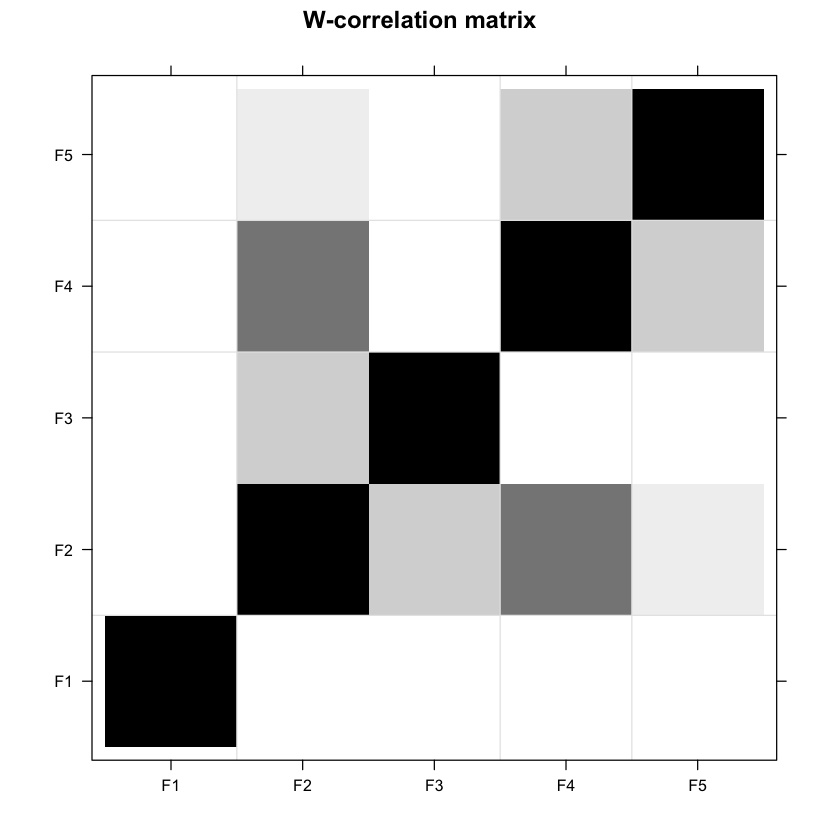

In [11]:
#Generemos la W-corrr matrix
wx=wcor(sx, groups=1:5)
plot(wx, grid=c(2,4,5,7))


Esta gráfica muestra los primeros cinco eigen-tripletes. La señal puede estar contenplada en el primer triplete o componente, ya que se muestran dos bloques generales. Uno con el primer triplete y el segundo, a partir del segundo al 5to triplete. Que se muestran como bloques ortogonales. Este segundo bloque, se pudiera contemplar como ruido, por la contaminación que presenta (no colores puros que indica una correlación de cero entre el triplete y el ruido).
Usualmente, los componentes de tendecia se muestran como cajas individuales (como en este caso). En otros casos, las estacionalidades usualmente se muestran con la unión de dos cajas, o sea, en pares.
Para areas grises, es una indicación que la correlación es mayor de cero o considerable, esta es una indicación que los componentes pueden estar 
combinados con ruido. La idea de la reconstrucción es así, seleccionar qué componentes pertenecen a qué elementos de la serie (tendencia, estacionalidad o ruido). 
En este caso puntual, la serie simple que generamos, presenta un solo triplete, que representa el componente de la serie de tendencia.


Tembien se puede ver que el primer componente (eigentriple tambie llamado), es suficiente para describir la señal de la serie, y que el segundo no, pues se muestra en este, contaminado con el ruido. 

PASO 4: Promedio diagonal: Su propósito es obtener una matriz Hankel de las series agrupada, para que se pueda converitr a una serie de tiempo. Se obtiene mediante el promedio diagonal de todas las matrices componentes elegidas en el paso anterior.
Es un proceso de diagonalizaciÓn.

In [12]:
#Retomenmos entonces el ejemplo anterior, pero considerando solo el primer eigenvalue en el agrupamiento.
I11<-c(1)
p<-length(I11)
XI11<-U[,I11]%*%matrix(Lambda[I11,I11],p,p)%*%t(V[,I11])
XI11 

2.789869,3.416082,4.042295,4.668508,5.294721,5.920935,6.547148,7.173361,7.799574
3.271838,4.006234,4.740630,5.475026,6.209422,6.943818,7.678214,8.412610,9.147006
3.753808,4.596386,5.438965,6.281544,7.124123,7.966701,8.809280,9.651859,10.494438
4.235777,5.186539,6.137300,7.088062,8.038823,8.989585,9.940346,10.891108,11.841869
4.717747,5.776691,6.835635,7.894580,8.953524,10.012468,11.071412,12.130357,13.189301
5.199716,6.366843,7.533970,8.701097,9.868225,11.035352,12.202479,13.369606,14.536733
5.681686,6.956996,8.232305,9.507615,10.782925,12.058235,13.333545,14.608855,15.884164


Una vez seleccionados los vectores característicos, procedemos a convertir el tipo de serie, que posee un formato tipo matriz de Hankel, a una serie de tiempo. Esto se realiza a través del promedio diagonal.

In [13]:
#Paso 4: Diagonal averaging: En este paso se obtiene entonces una aproximación a la serie original, 
#sin el ruido, con el primer eigenvalue:
D<-NULL
I1<-length(Y)
for (t in 1:I1){
  s1<-max(1, (t-I1+L))
  s2<-min(L,t)
  place<-(s1:s2)+L*(((t+1-s1):(t+1-s2))-1)
  D[t]<-mean(XI11[place])}
round(D,2)

[1]  2.79  3.34  3.93  4.56  5.22  5.92  6.66  7.61  8.56  9.69 10.86 12.06
[13] 13.30 14.57 15.88

Como podemos observar, este resultado final de serie, es un proxie de la serie original que generamos, vemos que es una aproximación muy cercana a la misma. Este, como se comentó en lecturas anteriores, es una de las funciones del SSA. Otro propósito del SSA, es como veremos a continuación en el siguiente ejemplo, el pronóstico.

<a id="7"></a> <br>
### 3. Funciones Manuales
Definimos algunas funciones complemetarias al paquete de Rssa que ayudan al proceso de selección para la recosntrucción.

In [14]:
##Hankelización:
UniHankel=function(Y,L){
  k<-length(Y)-L+1
  outer((1:L), (1:k), function(x,y) Y[(x+y-1)])
}

In [15]:
##Función SVD
SVD<- function(Y,L){
  X<-UniHankel(Y,L)
  svd(X)
}

In [16]:
###W-correlation
W.corr<-function(Yt,L, groups){
  m<-length(groups); w.corr<-diag(m)
  N<-length(Yt)
  w<-((N+1)-abs((N+1)/2-L)-abs((N+1)/2-1:N)-
    abs(abs((N+1)/2-L)-abs((N+1)/2-1:N)))/2
wcorr<-function(i,j){
  Y1<-SSA.Rec(Yt,L,groups[[i]])$Approximation
  Y2<-SSA.Rec(Yt,L,groups[[j]])$Approximation
  sum(w*Y1*Y2)/sqrt(sum(w*Y1^2)*sum(w*Y2^2))}
for (i in 1:(m-1)){
  for (j in (i+1):m){
    w.corr[i,j]=w.corr[j,i]=wcorr(i,j)}}
rownames(w.corr)<-colnames(w.corr)<-groups
w.corr
}

In [17]:
###Plotting Images w.corr
Plt.Img<-function(x){
  min<-min(x)
  max<-max(x)
  yLabels<-rownames(x)
  xLabels<-colnames(x)
  if( is.null (xLabels)){
    xLabels <- c(1:ncol(x))
  }
  if (is.null(yLabels)){
    yLabels <- c(1:nrow(x))
  }
  layout(matrix(data=c(1,2), nrow=1, ncol=2),
         widths=c(4,1), heights=c(1,1))
  ColorRamp<-gray( seq(1,0, length=20))
  ColorLevels<-seq(min, max, length=length(ColorRamp))
                  par(mar=c(3,5,2.5,2))
                  image(1:length(xLabels), 1:length(yLabels),
                        t(x), col=colorRamp, xlab="",
                        ylab = "", axes=FALSE, zlim=c(min, max))
                  title(main=c("Image Plot"))
                  axis(BELOW<-1, at=1:length(xLabels),
                       labels=xLabels, cex.axis=0.7)
                  axis(LEFT<-2, at=1:length(yLabels),
                       labels=yLabels, las=HORIZONTAL<-1,
                       cex.axis=0.7)
                  box()
                  par(mar=c(3,2.5, 2.5,2))
                  image(1, ColorLevels,
                        matrix(data=ColorLevels, ncol=length(ColorLevels), nrow=1),
                        col=colorRamp,
                        xlab="", ylab="",
                        xaxt="n")
                  layout(1)
}

In [18]:
##Singular Values graph
Sing.plt<-function(Y,L){
  lambda<-log(SVD(Y,L)$d)
  d<-length(lambda)
  win<-1:d
  plot.new()
  plot.window(xlim=range(win), ylim=range(lambda))
  usr=par("usr")
  rect(usr[1], usr[3], usr[2], usr[4])
  lines(win, lambda, lwd=2)
  points(win, lambda, pch=21, bg="gray")
  axis(1)
  axis(2)
  box()
  title(xlab="Number")
  title(ylab="Log.Singular Values")}


<a id="8"></a> <br>
### 4. Ejemplo 2: Introductorio
Veamos ahora, un ejemplo con pronóstico empleando la paquetería de Rssa. 
Los datos representan las ventas de vino australiano fortificado (Fortified) globales (Miles de litros) 
Los datos completos son de 1980 enero a julio 1995 (187 datos). Pero, despues de 1994 hay datos NA's. Por tanto se analizan 174 datos.

Fuente: Golyandina(2020)

In [19]:
#Importamos la base de datos, de la paquetería Rssa.
library(Rssa)
data("AustralianWine", package="Rssa")
head(AustralianWine)

,Total,Drywhite,Fortified,Red,Rose,Sparkling,Sweetwhite
Jan 1980,15136,1954,2585,464,112,1686,85
Feb 1980,16733,2302,3368,675,118,1591,89
Mar 1980,20016,3054,3210,703,129,2304,109
Apr 1980,17708,2414,3111,887,99,1712,95
May 1980,18019,2226,3756,1139,116,1471,91
Jun 1980,19227,2725,4216,1077,168,1377,95


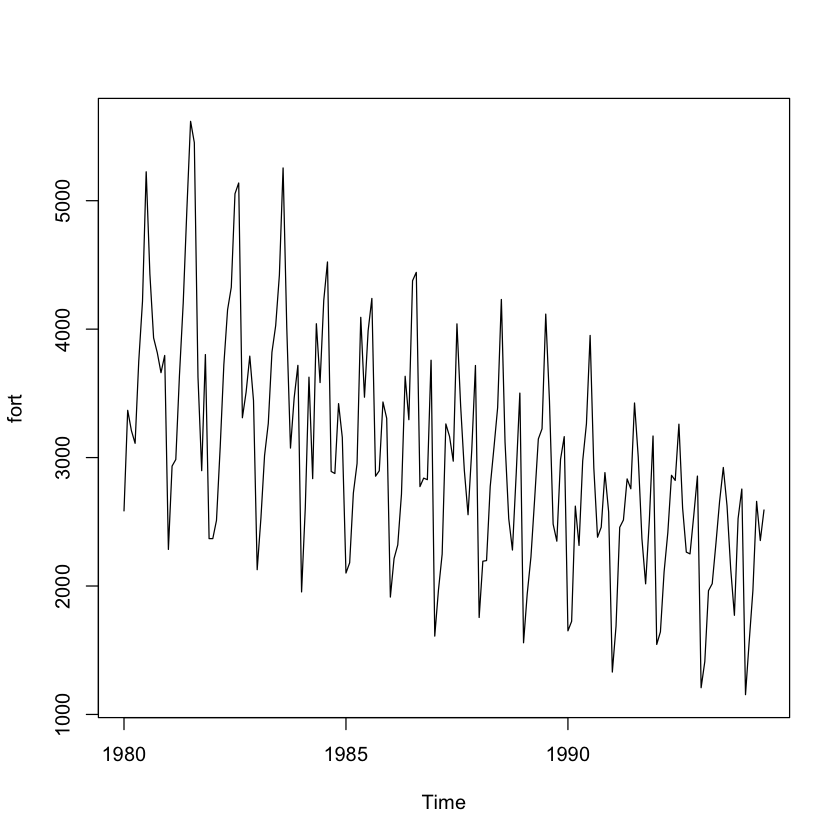

In [20]:
#Se extraen los 174 datos.
wine= window(AustralianWine, end=time(AustralianWine)[174])
##Denominamos fort, a la columna del vino de interés y lo graficamos:
fort=wine[,3]
plot(fort) #Gráfica de la serie

In [21]:
#Comencemos con el proceso
#FASE 1. Descomposición, si no especificamos la longitud de la ventana, el programa lo define automáticamente, cercano a L=N/2.
s.fort=ssa(fort)
summary(s.fort)


Call:
ssa(x = fort)

Series length: 174,	Window length: 87,	SVD method: eigen
Special triples:  0

Computed:
Eigenvalues: 50,	Eigenvectors: 50,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 0.03735 MiB


### paso 2: Reconstrucción
Una vez generado la fase 1, procedemos con la fase 2 que contempla la reconstrucción y promedio diagonal.
Para ello y particularmente para la fase de reconstrucción, nos ayudamos de las herramientas visuales, como la W-corrr matrix.
Posterios a la selección de vectores para los componentes de la serie, procedemos con la fase agrupamiento.
Contamos así con las siguientes herramientas de visualización:
1. La matriz de w-correlaciones, con w entre las series elementales reconstruidas.
La w-correlation plot o matriz de w correlaciones es una medida natural entre la similitud entre dos series. Nos permite identificar el qué tan bien el SSA separa la señal del ruido. Si el valor absoluto de la w-correlación es pequeño cercano a cero, entonces las series correspondientes (componentes y ruido) no son separables; sin embargo, si es alta, cercana a uno, indica que las series son separables. 

2. Figura: Scree-plot, del logaritmo de valores singulares, log(lambdai) vs raiz(lambdai).
Se grafican los log eigen values contra la raíz de éstos. Aplicando reglas del codo o semejantes, es posible identificar el aporte de los vectores al proceso de separación.
3. Figura: 1-dimensional (1D) de los eigenvectors Ui
En estas figuras, buscamos identificar el comportamiento linear o harmónico de los vectores. Aquellos lineales corresponden a los componentes de tendencia, mientras que los harmónicos, a los de estacionalidad que se identifican en pares, como se explica a continuación.
4. Figura: (2D) 2-dimensional de los eigenvectores (Ui,Ui+1). 
Permite identificar los pares de tripletes que corresponden a los componentes armónicos de la serie. 
Esto es, los componentes puros de seno y coseno con frecuencias, amplitudes  y fases similares, crean gráficos con puntos similares a un círculo o si la frecuencia w y periodo P están dados por P=1/w y es entero, estos puntos son los vértices de polígonos regulares con P puntos; si la frecuencia es w<0.5, los puntos se verán como n-vértices de polígonos regulares. Así, debemos identificar de alguna manera, los polígonos regulares.

El uso de cada una de estas herramientas puede ser en cualquier orden, usualmente se comienza por la w-correlación, la scree plot, la 1D plot y finalmente, la 2D plot.

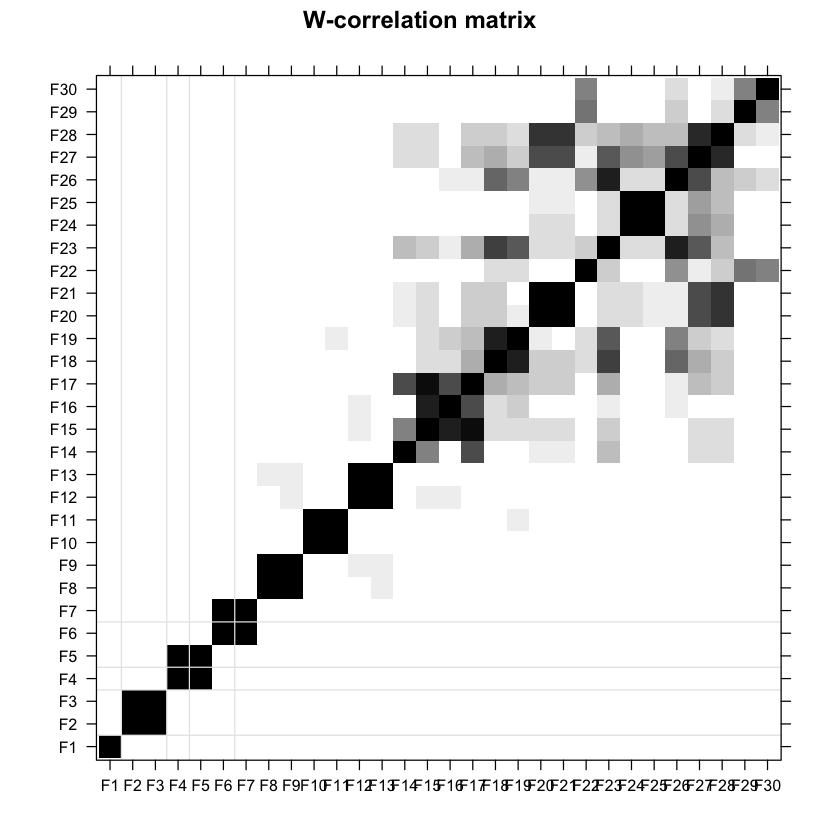

In [22]:
## comencemos con la w-correlación
wfort<-wcor(s.fort, groups=1:30)
plot(wfort, grid=c(2,4,5,7))  #Esta es generada a través de la función manual. 

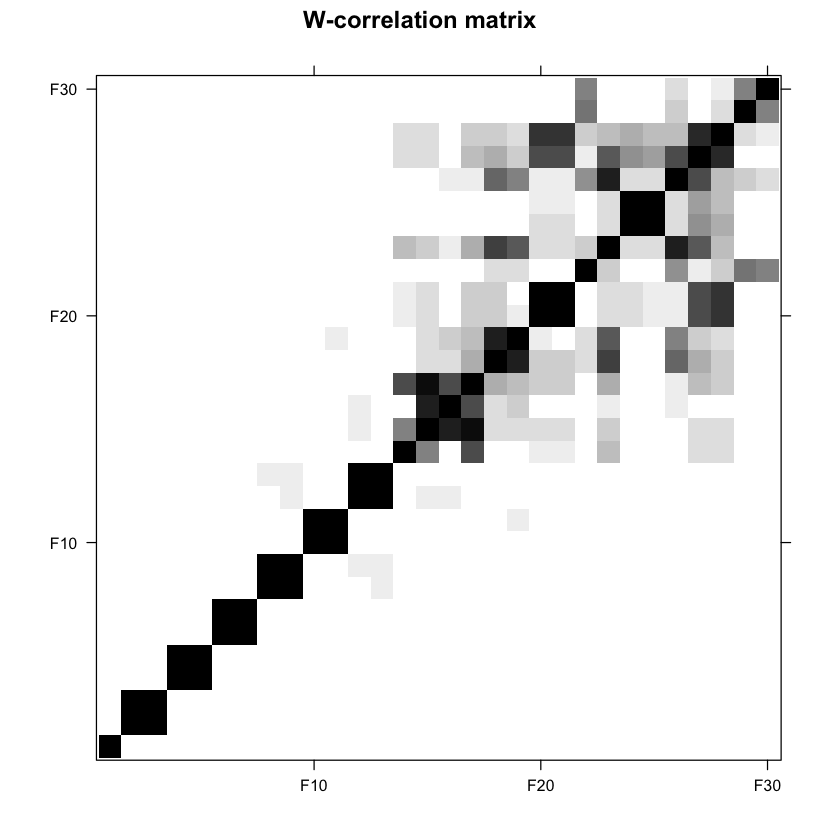

In [23]:
#Tambien podemos emplear la función de w-corr del paquete del Rssa.
plot(wcor(s.fort, groups = 1:30), scales=list(at=c(10, 20, 30)))

Como podemos observrar en la imagen, del 1-13vo triplete, se puede explicar la señal, del 14 en adelante, pertenecería a un bloque de ruido. Tambien, el primer triplete pertence a la tendencia, por ser un componente aislado individual, y del 2 al 13, que están en pares pertenece a la estacionalidad.

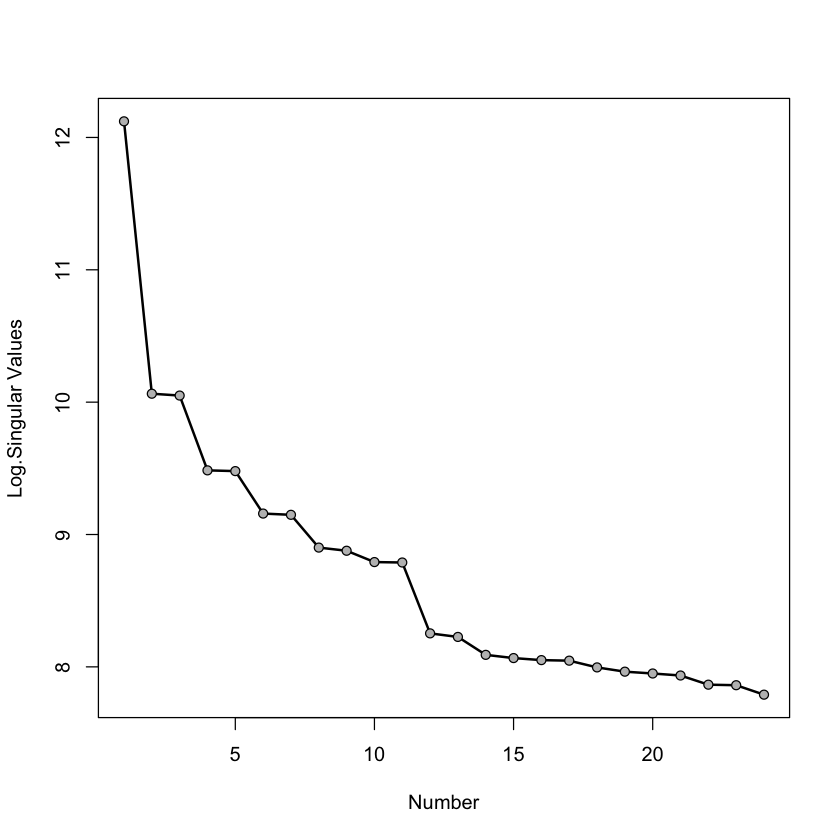

In [24]:
##Otra herramienta muy útil es la gráfica de valores gráfica de valores singulares, donde vemos el aporte de cada triplete.
Sing.plt(fort, 24)

Como podemos observar en la figura anterior, hasta el vector 12 no se ve un decremento del log-valor singular. Esto es coherente a los gráficos anteriores. Procedamos con la herramienta de vectores singulares.

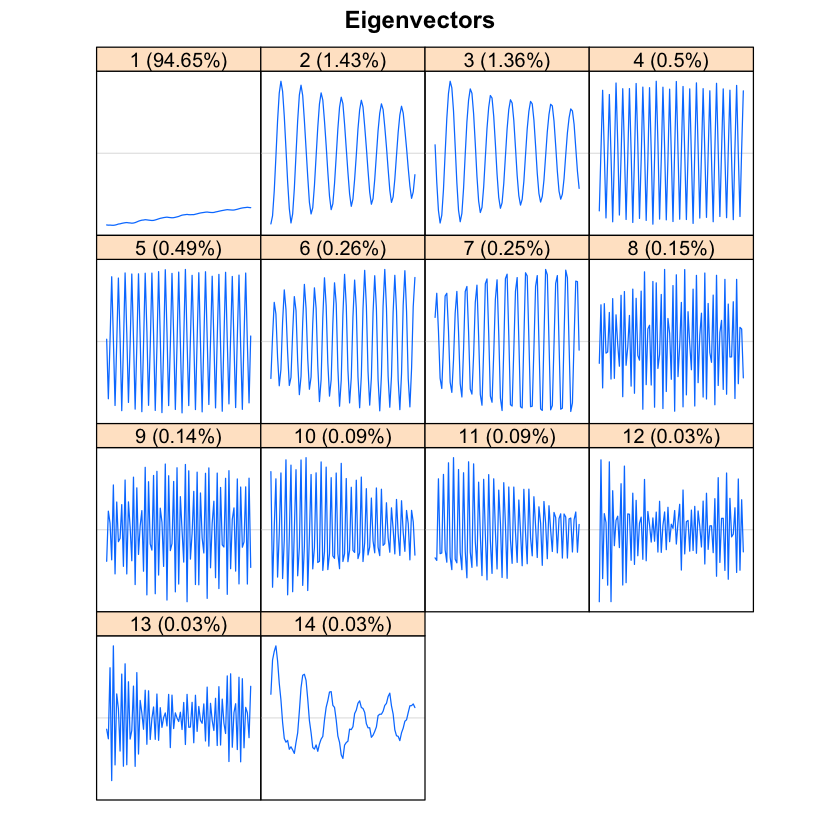

In [25]:
##Gráfica de vectores. Esta es otra gráfica que muesta el comportamiento, ya sea gradual u oscilatorio de los eigenvectors individuales. 
#Esta es de utilidad para complementar la w-correlación e identificar qué vectores pertenecen a la tendencia y cuáles otros a la estacionalidad. 
plot(s.fort, type="vectors", idx=1:14)

Como podemos ver en la figura anterior, es el primer componente que aporta la mayor parte de la variación y corresponde por su comportamiento no armónico, a un vector de tendencia. El resto, deberemos analizarlos con la gráfico de pares, que veremos a continuación.

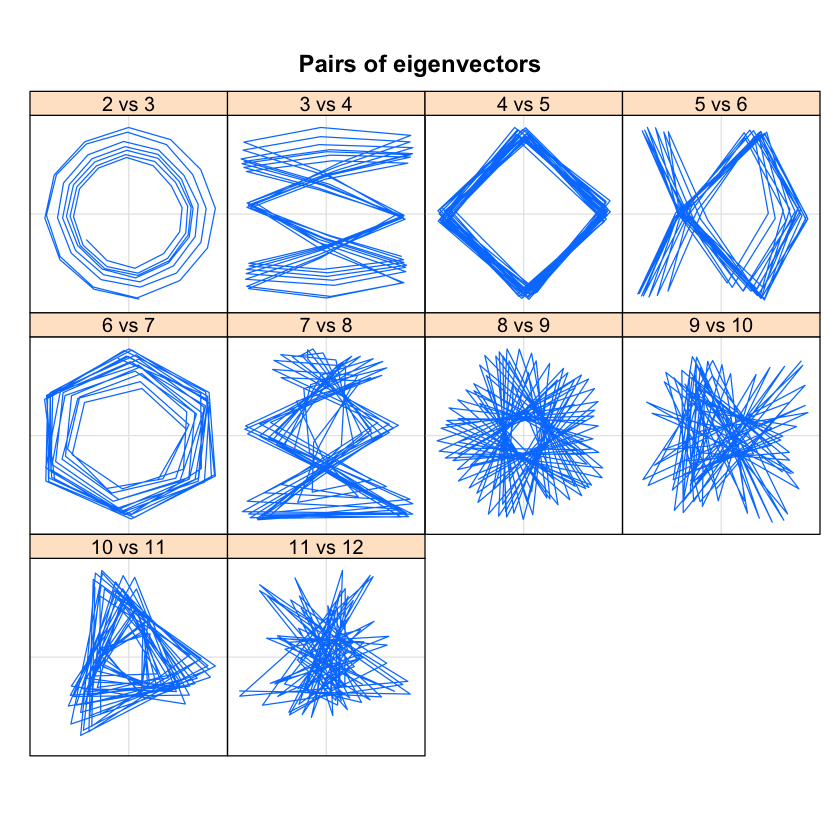

In [26]:
#Gráfico de vectores en pares.
#Esta gráfica ayuda de manera complementaria a la w-correlación y vectores individuales, qué vectores pertenecen a la estacionalidad. 
#Estos, formaran polígonos regulares.
plot(s.fort, type= "paired", idx=2:11, plot.contrib = FALSE)  #los v�rtices son la frecuencia, determinan el periodo de las ondas seno.

Como podemos ver en este ejemplo de gráfico 2D, los vectores 2 y 3, 4 y 5, 6 y 7; 8 y 9; 1o y 11, forman vectores que pertenecen a la estacionalidad, ya que forman polígonos regulares.

#### Fase 2. Paso 3 y 4: Reconstrucción y promedio diagonal

Una vez identificados los vectores que conforman la señal, generamos la reconstrucción y promedio diagonal. A pesar de ser pasos separados, la función de "recosntruct()" en R, genera los dos pasos en uno.

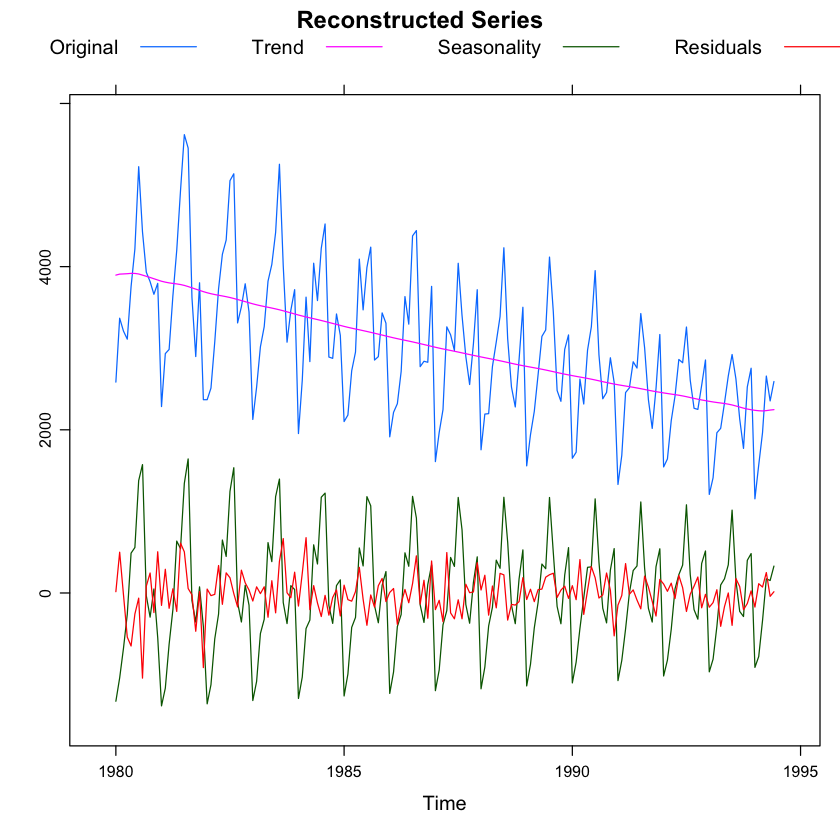

In [27]:
##La función de reconstrucción de Rssa es la función reconstruct(), donde seleccionamos lso vectores para tendencia y para estacionalidad.
r.fort= reconstruct(s.fort, groups= list(Trend=1, Seasonality=c(2:3,4:5,6:7,8:9,10:11)))
plot(r.fort, add.residuals=TRUE, add.original=TRUE, plot.method="xyplot",
     superpose=TRUE, auto.key=list(columns=4))


Podemos observar tanto el comportamiento de la tendencia de la serie, así como el componente de la estacionalidad, que particularmente representa una estacionalidad conformada por varios vectores singulares.

Podemos observar los componentes de la serie, a través de los comandos de $Trend y $Seasonality.

In [28]:
#print(parestimate(s.fort, groups = list(2:3, 4:5), method = "pairs")) ##Muestra la frecuencia de los pares 2-3 y 4-5.

r.fort$Trend #Se obtiene tendencia

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1980,3896.129,3908.281,3910.610,3913.357,3917.445,3916.776,3910.007,3896.109,3881.753,3867.366,3851.775,3836.204
1981,3821.020,3809.859,3800.911,3794.285,3788.189,3780.528,3769.864,3755.881,3740.003,3724.381,3709.179,3693.627
1982,3679.880,3668.075,3657.972,3649.078,3640.672,3631.653,3621.476,3609.763,3596.881,3584.138,3570.920,3557.393
1983,3544.111,3532.155,3521.334,3511.412,3502.027,3492.314,3482.005,3471.005,3458.851,3446.069,3433.100,3420.018
1984,3406.932,3394.940,3383.620,3372.447,3361.890,3351.025,3339.881,3328.158,3315.957,3303.968,3291.921,3279.690
1985,3267.600,3256.275,3245.687,3235.591,3225.814,3215.658,3205.321,3194.627,3183.577,3172.567,3161.375,3149.934
1986,3138.438,3127.489,3117.022,3107.043,3097.377,3087.542,3077.523,3066.978,3056.027,3045.107,3034.054,3023.006
1987,3011.820,3001.281,2991.222,2981.783,2972.431,2962.832,2953.109,2943.014,2932.721,2922.475,2912.563,2902.911
1988,2893.188,2883.728,2874.410,2865.234,2855.863,2846.110,2836.008,2825.463,2814.903,2804.674,2795.095,2786.124
1989,2777.269,2768.598,2760.055,2751.468,2742.452,2732.907,2722.938,2712.516,2702.003,2691.787,2682.118,2672.978


In [29]:
r.fort$Seasonality #Se obtiene estacionalidad

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1980,-1.327077e+03,-1.040407e+03,-6.786618e+02,-2.612567e+02,4.885128e+02,5.571734e+02,1.378088e+03,1.573378e+03,-3.339166e+01,-2.963311e+02,4.918484e+01,-5.461950e+02
1981,-1.383972e+03,-1.166543e+03,-6.281167e+02,-2.000580e+02,6.362329e+02,5.436519e+02,1.344074e+03,1.643114e+03,-9.318982e+01,-3.570257e+02,7.518200e+01,-4.101246e+02
1982,-1.358822e+03,-1.124571e+03,-5.620577e+02,-2.577595e+02,6.493849e+02,4.476732e+02,1.245845e+03,1.535222e+03,-1.160296e+02,-3.558022e+02,9.442983e+01,-1.484317e+02
1983,-1.318418e+03,-1.084328e+03,-4.968226e+02,-3.224616e+02,6.175064e+02,3.842313e+02,1.181558e+03,1.396536e+03,-1.168433e+02,-3.749896e+02,8.960386e+01,4.303185e+01
1984,-1.292777e+03,-1.031319e+03,-4.355948e+02,-3.321841e+02,5.903343e+02,3.553065e+02,1.173858e+03,1.223983e+03,-1.518905e+02,-3.727337e+02,9.026292e+01,1.609043e+02
1985,-1.262624e+03,-9.936209e+02,-4.211981e+02,-2.995621e+02,5.518145e+02,3.313448e+02,1.180697e+03,1.068542e+03,-1.551682e+02,-3.652295e+02,9.368813e+01,2.627390e+02
1986,-1.231237e+03,-9.682901e+02,-4.118972e+02,-2.639257e+02,4.923489e+02,3.273882e+02,1.184178e+03,9.197699e+02,-1.457057e+02,-3.612162e+02,1.034798e+02,3.431070e+02
1987,-1.197449e+03,-9.434302e+02,-3.910805e+02,-2.152075e+02,4.357745e+02,3.255833e+02,1.171390e+03,7.756546e+02,-1.416231e+02,-3.707078e+02,1.300457e+02,4.428819e+02
1988,-1.174753e+03,-9.082546e+02,-4.043101e+02,-1.738734e+02,4.026360e+02,3.024194e+02,1.172959e+03,6.248533e+02,-1.508698e+02,-3.765069e+02,1.726362e+02,5.281191e+02
1989,-1.139271e+03,-8.745050e+02,-4.277478e+02,-1.160778e+02,3.548383e+02,2.973560e+02,1.170444e+03,4.915447e+02,-1.652312e+02,-3.775262e+02,2.201614e+02,5.559357e+02



### Pronóstico
Ya teniendo la serie reconstruida y en formato de serie de tiempo, podemos generar el pronóstico de la misma. La función que la genera es la de forecast(), donde debemos incluir la totalidad de los vectores como lista. El método usual es el "Recurrente", igualmente podemos incluir la generación de un intervalo de confianza mediante blocked bootstrapped a ciertos niveles.
Existen dos opciones para la generación de este intervalo de confianza. El de "prediction" y el de "confidence".La opción de interval="confidence", significa que aplica el cálculo a un intervalo de la serie lo que usualmente genera bandas más anchas; mientas que la opción de intervalis="prediction", es que el intervalo de prediccin se calcula para toda la serie.

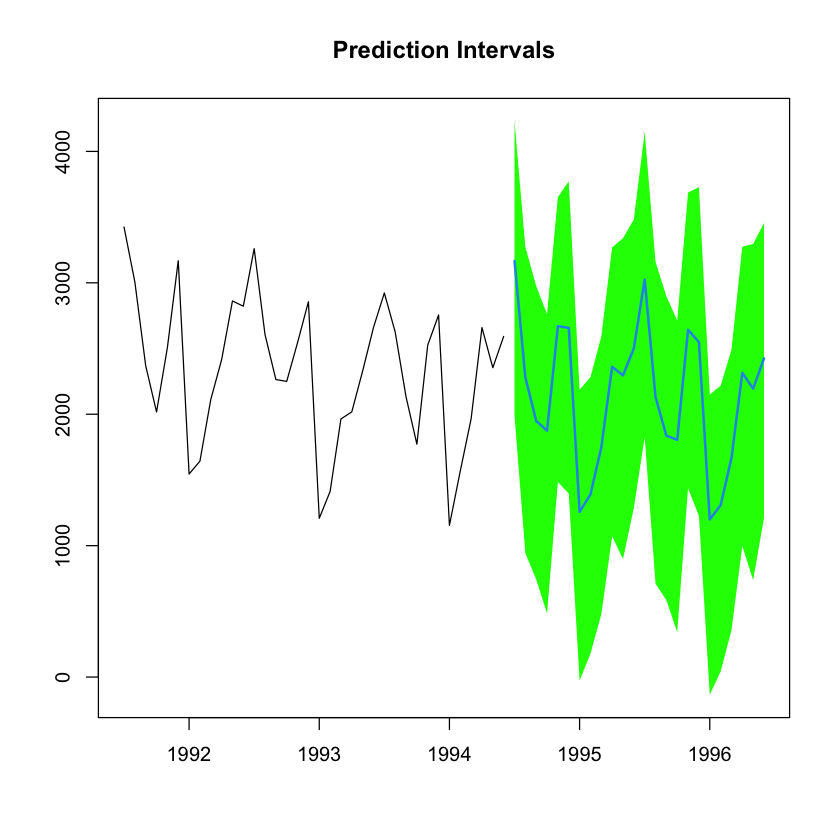

In [30]:
####################################################################################################
###FASE 3. Forecasting
set.seed(3)
for3fort<-forecast(s.fort, groups=list(c(1:11)), len=24, method="recurrent", interval="prediction", level=c(0.8,0.99),
                  only.new=TRUE)

plot(for3fort, include=36, shadecols="green", type="l", main="Prediction Intervals")


In [31]:
#podemos echar un vistazo a los valores pronósticos:
for3fort$mean #pronóstico

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,,3165.700,2280.297,1948.579,1874.894,2670.397,2657.028
1995,1257.664,1389.119,1746.538,2361.075,2295.765,2500.057,3024.394,2130.820,1837.023,1805.115,2642.404,2548.838
1996,1199.604,1307.376,1665.780,2314.680,2194.564,2424.569,,,,,,


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,,3225.494,2215.381,1950.954,1815.614,2710.730,2774.611
1995,1206.907,1412.179,1661.871,2352.149,2281.459,2477.935,3093.798,2048.235,1845.940,1729.603,2698.781,2676.989
1996,1146.704,1331.769,1560.472,2320.905,2173.114,2414.599,,,,,,


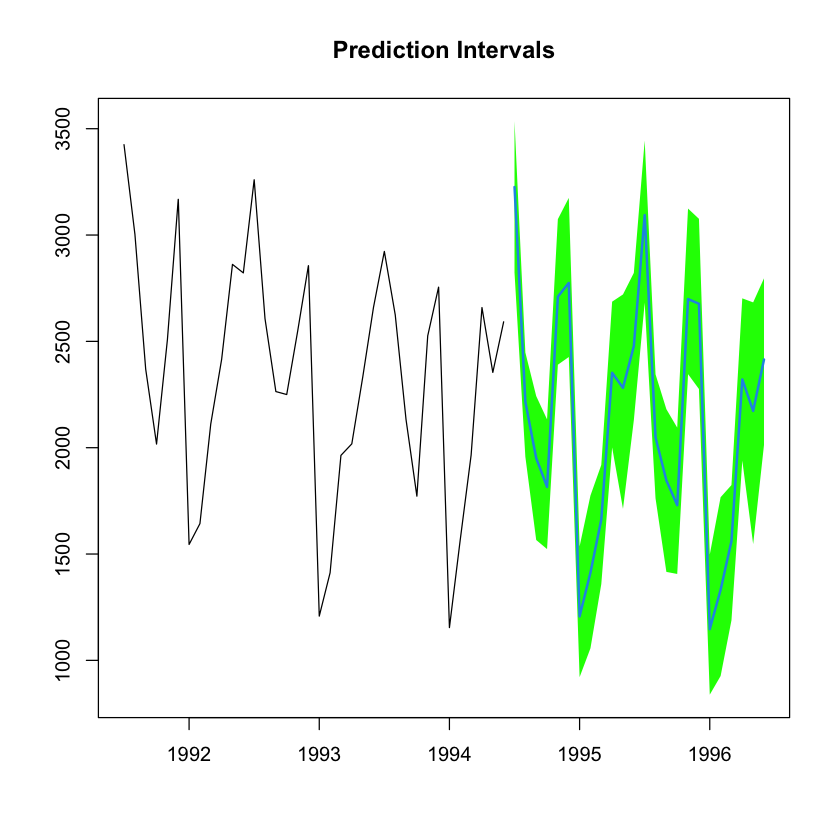

In [32]:
#Ahora, apliquemos la opción de intervalo de confianza.
fore4fort<-forecast(s.fort, groups=list(trend= 1:11), method="recurrent", interval="confidence", only.intervals = FALSE, 
                 len=24, R=100, level=0.99)
plot(fore4fort, include=36, shadecols="green", type="l", main="Prediction Intervals")
fore4fort$mean

<a id="9"></a> <br>
#### Ejercicio 3: Datos financieros

Continuemos ahora con un ejemplo de aplicación de SSA empleando datos financieros. Usaremos los datos des la serie de precios de cierre del activo AMZN en fechas particulares que genran resultados útiles a la metodología SSA.

In [33]:
#Importación de librerias requeridas:
library(Rssa)
library(TTR)
library(quantmod)
library(xts)
library(tseries)
#library(TSA)
library(ggplot2)
library(PerformanceAnalytics) ##vamos a ver, rendimientos
library(Metrics)
library(tseries)

Warning message:
“package ‘TTR’ was built under R version 4.2.3”
Warning message:
“package ‘quantmod’ was built under R version 4.2.3”
Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.  

ERROR: Error in library(PerformanceAnalytics): there is no package called ‘PerformanceAnalytics’


In [ ]:
options(digits=3)
options(warn=-1)

#Obtención DATOS:
AMZN<-getSymbols("AMZN", from="2019-08-01", to="2021-04-30",auto.assign = FALSE)
AMZN<-na.omit(AMZN)
AMZN<-AMZN[,4]
head(AMZN)
colnames(AMZN)<-c("AMZN")

In [ ]:
### Graficamos la serie
plot(AMZN, ylab="Precios")
str(AMZN)

In [ ]:
# Un paso importante que hay que hacer, es pasar los datos de formato xts a ts, que es el formato que emplea SSA. para ello, pasamos primero a data frame
# y luego a ts.
AMZN <- data.frame(date=index(AMZN), coredata(AMZN))
AMZN1<-AMZN$AMZN
##pasamos a ts
amzn.ts<-ts(AMZN1, start=c(2014,01), frequency = 365)
plot(amzn.ts)

In [ ]:
## Preprocesamiento: Partición de datos en conjunto de prueba y de entrenamiento.
## Podemos partir la serie en a manera de obtener 36 datos para la prueba. 
h <- round(length(amzn.ts)*0.081, digits = 0)
h

In [ ]:
#Una vez creada la ventana h, generamos los conjuntos de entrenamiento y prueba.
train<-amzn.ts[1:(length(amzn.ts)-h)]
test<-amzn.ts[(length(amzn.ts)-h+1):length(amzn.ts)]
tail(train)
head(test)
str(test)

train.ts=ts(train,start=c(2019,08), frequency = 365)

#### Pasos 1 y 2
En estos pasos, aplicamos la función de ssa() a la serie en formato ts y procedemos a la selección para la recosntrucción.

In [ ]:
##SSA embeding y separación:
s1<-ssa(train.ts)  #Hay otros métodos como el "topelitz", para series estacionarias. En este caso no aplica.
s1

In [ ]:
##Reconstrucción: empleamos las herramientas visuales para la selección.
wplot<-wcor(s1, group=1:25)
plot(wplot)

In [ ]:
#Tambien generamos la scree-plot.
Sing.plt(amzn.ts, 30)

Como vemos en los gráficos anteriores, el primer vector aporta la mayor de la variación, y hasta el octavo se observa una separación con los vectores no separables, y en la scree plot, un decaimiento del log-valores singulares. Procedemos con las gráficas de vectores singulares y en pares.

Warning message in plot.window(...):
“"idx" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“plot type 'vectors' will be truncated to first character”


ERROR: Error in plot.xy(xy, type, ...): invalid plot type 'v'


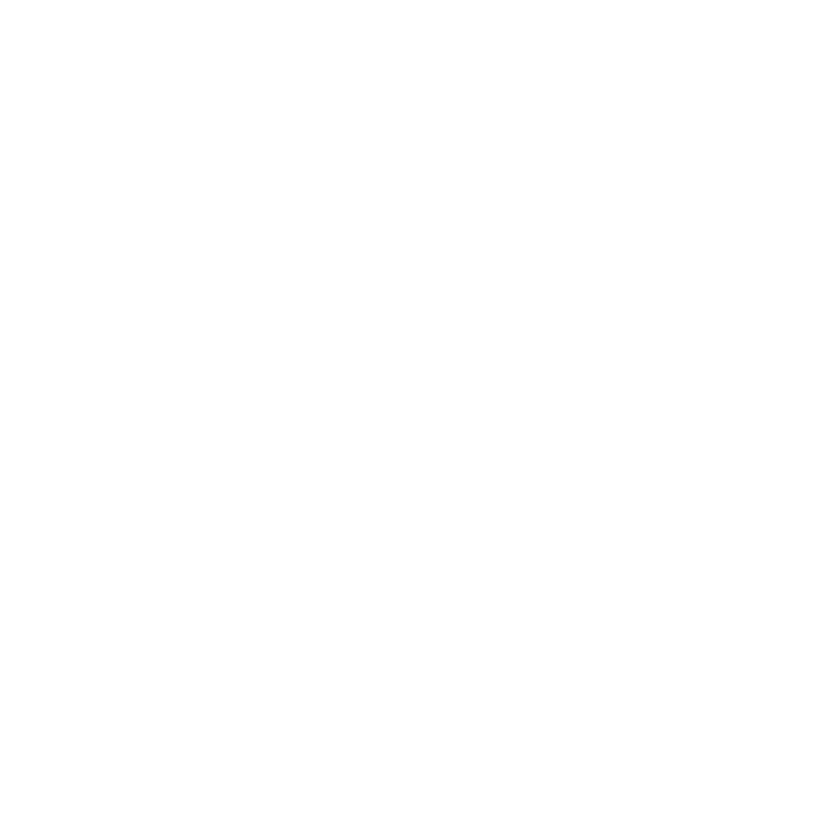

In [34]:
###Gráficas componentes 1D (compoente por componente) y la 2D (pares formen poligonos regulares : estables)
plot(s1, type="vectors", idx=1:24)
plot(s1, type= "paired", idx=2:24, plot.contrib = FALSE)

A partir de los resultados anteriores, podemos proponer que los vectores 1,2, 3, 8, 9 son candidatos para los vectores que comprenden la tendencia; mientras que los pares de vectores 4 y 5, 6 y 7 representan la estacionalidad.

In [35]:
##Fase recontrucción:
r=reconstruct(s1, groups = list(Trend=1:3, 8,9, Seasonality=c(4:5, 6:7)))
plot(r, add.residuals=TRUE, add.original=TRUE, plot.method="xyplot",
     superpose=TRUE, auto.key=list(columns=4))

ERROR: Error in UseMethod("reconstruct"): no applicable method for 'reconstruct' applied to an object of class "c('double', 'numeric')"


In [36]:
#Generamos el pronóstico señalando los tripletes de la reconstrucción.
pronostico1<-forecast(s1, groups = list(c(1:3,8,9, 4:7)), len=h, method="recurrent", 
                                   interval = "prediction", level=c(0.8, 0.99),only.new=TRUE )

ERROR: Error in forecast.ts(object, ...): objeto 'h' no encontrado


In [37]:
# Graficamos el pronóstico.
autoplot(pronostico1, type="l", main="Prediction Intervals", ylab="Precio")

ERROR: Error in autoplot(pronostico1, type = "l", main = "Prediction Intervals", : objeto 'pronostico1' no encontrado


In [38]:
pred<-pronostico1$mean
pred

ERROR: Error in eval(expr, envir, enclos): objeto 'pronostico1' no encontrado


In [39]:
###Cálculo error MAPE, RMSE
library(Metrics)
RMSE1<-rmse(test,pred)
RMSE1
MAPE1<-mape(test, pred)
MAPE1


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




ERROR: Error in se(actual, predicted): objeto 'test' no encontrado


In [40]:
###Otro modelo de comparación (auto.arima):
library(forecast)
mod2<-auto.arima(train.ts)
mod2

ERROR: Error in as.ts(x): objeto 'train.ts' no encontrado


In [41]:
#Pronóstico
pron2<-forecast(mod2, h=h)
pronos2<-pron2$mean
RMSE2<-rmse(test, pronos2)
RMSE2
MAPE2<-mape(test, pronos2)
MAPE2

ERROR: Error in forecast(mod2, h = h): objeto 'mod2' no encontrado


In [42]:
####Otro modelo: ets
mod3<-ets(train, lambda = "auto")
mod3

ERROR: Error in class(y) %in% c("data.frame", "list", "matrix", "mts"): objeto 'train' no encontrado


In [57]:
#Pronóstico
pron3<-forecast(mod3, h=h)

pronos3<-pron3$mean
RMSE3<-rmse(test, pronos3)
RMSE3
MAPE3<-mape(test, pronos3)
MAPE3

[1] 11.5

[1] 0.054

In [58]:
## Otro modelo: FEED FWD ANN
mod4<-nnetar(train.ts, lambda=TRUE)
mod4

Series: train.ts 
Model:  NNAR(1,1,2)[365] 
Call:   nnetar(y = train.ts, lambda = TRUE)

Average of 20 networks, each of which is
a 2-2-1 network with 9 weights
options were - linear output units 

sigma^2 estimated as 7.09

[1] 11.4

[1] 0.0541

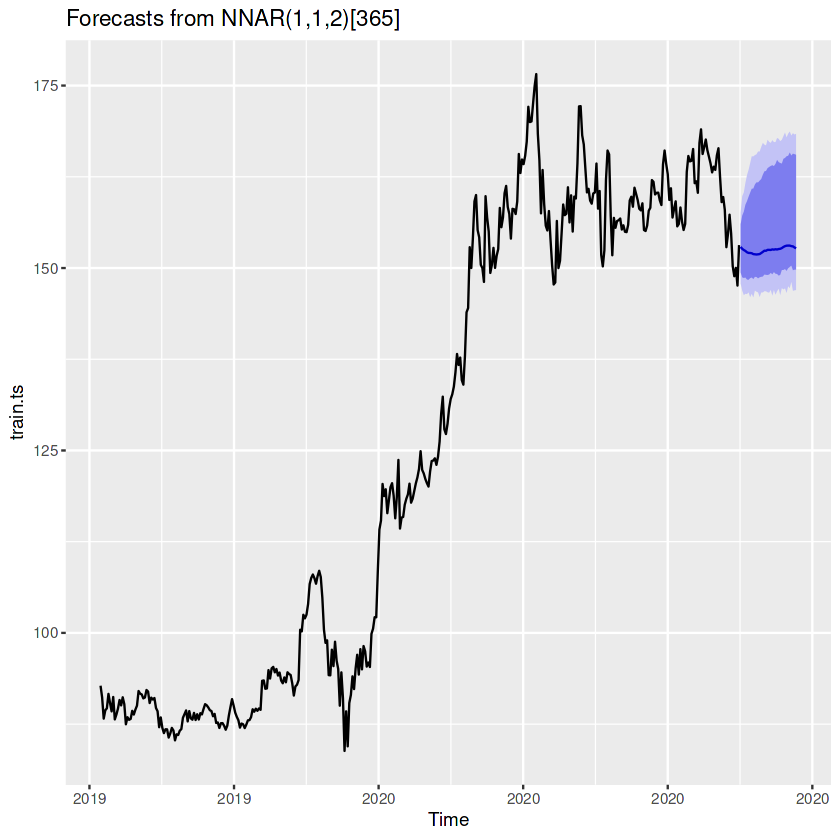

In [59]:
#Pronóstico
autoplot(forecast(mod4,PI=TRUE, h=h))
pronos4<-forecast(mod4, h=h)
pronos4<-pronos4$mean
RMSE4<-rmse(test, pronos4)
RMSE4
MAPE4<-mape(test, pronos4)
MAPE4

In [60]:
### Comparación modelos:

Modelo<-c("SSA", "ARIMA", "ETS", "nnetar")

RMSE<-c(RMSE1, RMSE1, RMSE3, RMSE4)

MAPE<-c(MAPE1, MAPE2, MAPE3, MAPE4)

resul<-data.frame(Modelo,RMSE, MAPE)

print((resul))


  Modelo  RMSE   MAPE
1    SSA  6.99 0.0350
2  ARIMA  6.99 0.0511
3    ETS 11.48 0.0540
4 nnetar 11.36 0.0541


Como podemos observar, el método SSA genera muy buenos resutados de pronóstico, comparado con métodos de redes neuronales, de suavizamiento exponencial y Arimas.

Igualmente, podemos revisar las características de la serie mediante la función de tsfeatures. Como podemos ver, el SSA es un buen método muy versátil para series con niveles de linealidad altos y niveles de entropía bajos. Esto a pesar que el método es más recomendado para las series con bajas linealidades y altos niveles de entropía.

In [61]:
library(tsfeatures)
tsfeatures(train.ts)

frequency,nperiods,seasonal_period,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
365,1,365,0.987,3.65e-09,18.5,-0.345,0.726,1.04,0.0846,0.994,9.42,-0.0838,0.0544,-0.545,0.418,-0.12


En este tutorial estudiamos la metodología de SSA como método de descomposición y de pronóstico para las series de tiempo, el cual es un método muy útil para series que no cumplen con la condición de estacionariedad.